4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 69s 35ms/step - loss: 0.4863 - accuracy: 0.8205 - val_loss: 0.3601 - val_accuracy: 0.8683
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3139 - accuracy: 0.8856 - val_loss: 0.3293 - val_accuracy: 0.8764
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2685 - accuracy: 0.9021 - val_loss: 0.2916 - val_accuracy: 0.8950
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2388 - accuracy: 0.9121 - val_loss: 0.2733 - val_accuracy: 0.9002
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2156 - accuracy: 0.9212 - val_loss: 0.2626 - val_accuracy: 0.9027
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1932 - accuracy: 0.9271 - val_loss: 0.2734 - val_accuracy: 0.9042
Epoch 7/10
1875/1875 [==============================] - 52s 2

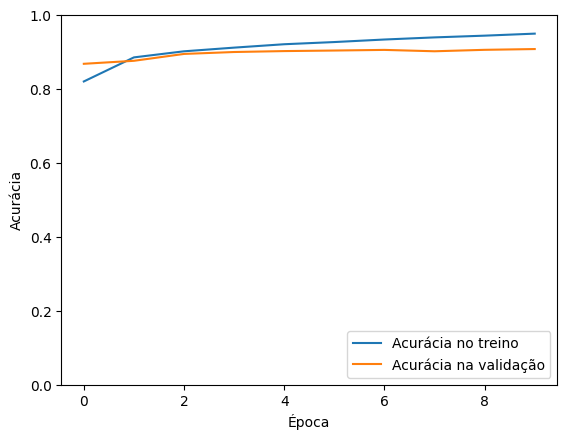

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Carregar o conjunto de dados Fashion-MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalizar as imagens
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expandir as dimensões para corresponder ao formato de entrada esperado (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Construindo o modelo da CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adicionar a camada totalmente conectada
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compilando o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Avaliando o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nAcurácia no conjunto de teste: {test_acc}')

# Plotando as curvas de aprendizado
plt.plot(history.history['accuracy'], label='Acurácia no treino')
plt.plot(history.history['val_accuracy'], label='Acurácia na validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
